<a href="https://colab.research.google.com/github/xvfdesii/034_Wa-Ode-Asriyani-Tugas-1-Machine-Learning/blob/main/034_Wa_ode_Asriyani_Obesity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary library!
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

In [ ]:

data_path = os.path.join('/content/Obesity Classification.csv')
data = pd.read_csv(data_path)

In [ ]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
print(
    f"The data has {data.shape[0]} rows and {data.shape[1]} columns."
)

The data has 108 rows and 7 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [ ]:
data.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [ ]:
data.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [ ]:
data['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [ ]:
data['Label'].value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [ ]:
data.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

<Axes: >

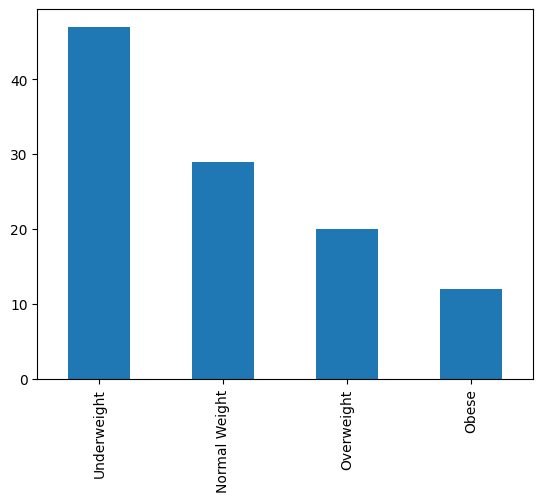

In [ ]:
data['Label'].value_counts().plot(kind='bar')

In [ ]:
data.select_dtypes(include=['object']).columns.tolist()

['Gender', 'Label']

In [ ]:
# encoding the object type data

obj_cols = data.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

for obj in obj_cols:
    le.fit(data[obj])
    data[obj] = le.transform(data[obj])

In [ ]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


In [ ]:
data.corr()

,ID,Age,Gender,Height,Weight,BMI,Label
ID,1.000000,-0.298257,-0.005595,-0.008224,-0.572625,-0.615235,0.347199
Age,-0.298257,1.000000,-0.091964,-0.076896,0.465106,0.474185,-0.134396
Gender,-0.005595,-0.091964,1.000000,0.876225,0.418415,0.342342,-0.281647
Height,-0.008224,-0.076896,0.876225,1.000000,0.428890,0.354340,-0.237683
Weight,-0.572625,0.465106,0.418415,0.428890,1.000000,0.972829,-0.565555
BMI,-0.615235,0.474185,0.342342,0.354340,0.972829,1.000000,-0.589237
Label,0.347199,-0.134396,-0.281647,-0.237683,-0.565555,-0.589237,1.000000


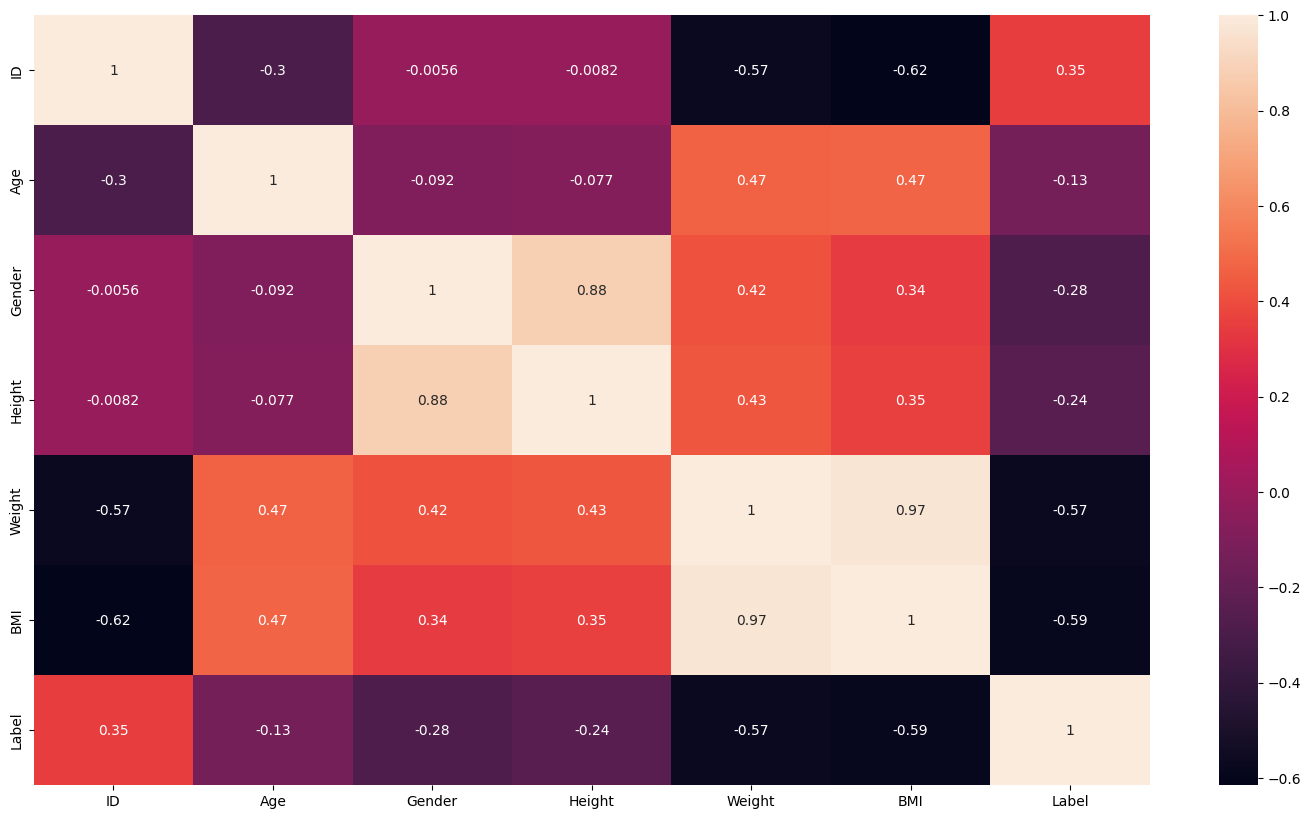

In [ ]:
# The above data is hard to interpreet, let us visualize it

# Set the size of figure to 12 by 10.
plt.figure(figsize=(18,10))

# Seaborn has very simple solution for heatmap
p=sns.heatmap(data.corr(), annot=True,robust=True)

In [ ]:
data.drop('ID',axis=1,inplace=True)

In [ ]:
X = data.drop('Label',axis=1)
y = data['Label']

# Importing the train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
# Before smote
X_train.shape

(86, 5)

In [ ]:
y_train.shape

(86,)

In [ ]:
# Class distribution before resampling
y_train.value_counts()

3    40
0    20
2    17
1     9
Name: Label, dtype: int64

In [ ]:
# Applyting resampling
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=5)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
y_train_res.value_counts()

2    40
1    40
3    40
0    40
Name: Label, dtype: int64

In [ ]:
y_train_res.shape , X_train_res.shape

((160,), (160, 5))

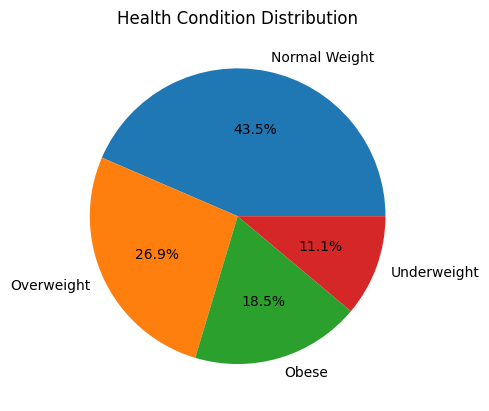

In [ ]:
class_count = data['Label'].value_counts()

# Create a list of labels
labels = ["Normal Weight", "Overweight", "Obese", "Underweight"]

vals = class_count.values

# Plot the pie chart
plt.pie(vals, labels=labels, autopct="%1.1f%%")

# Add a title
plt.title("Health Condition Distribution")

# Show the plot
plt.show()

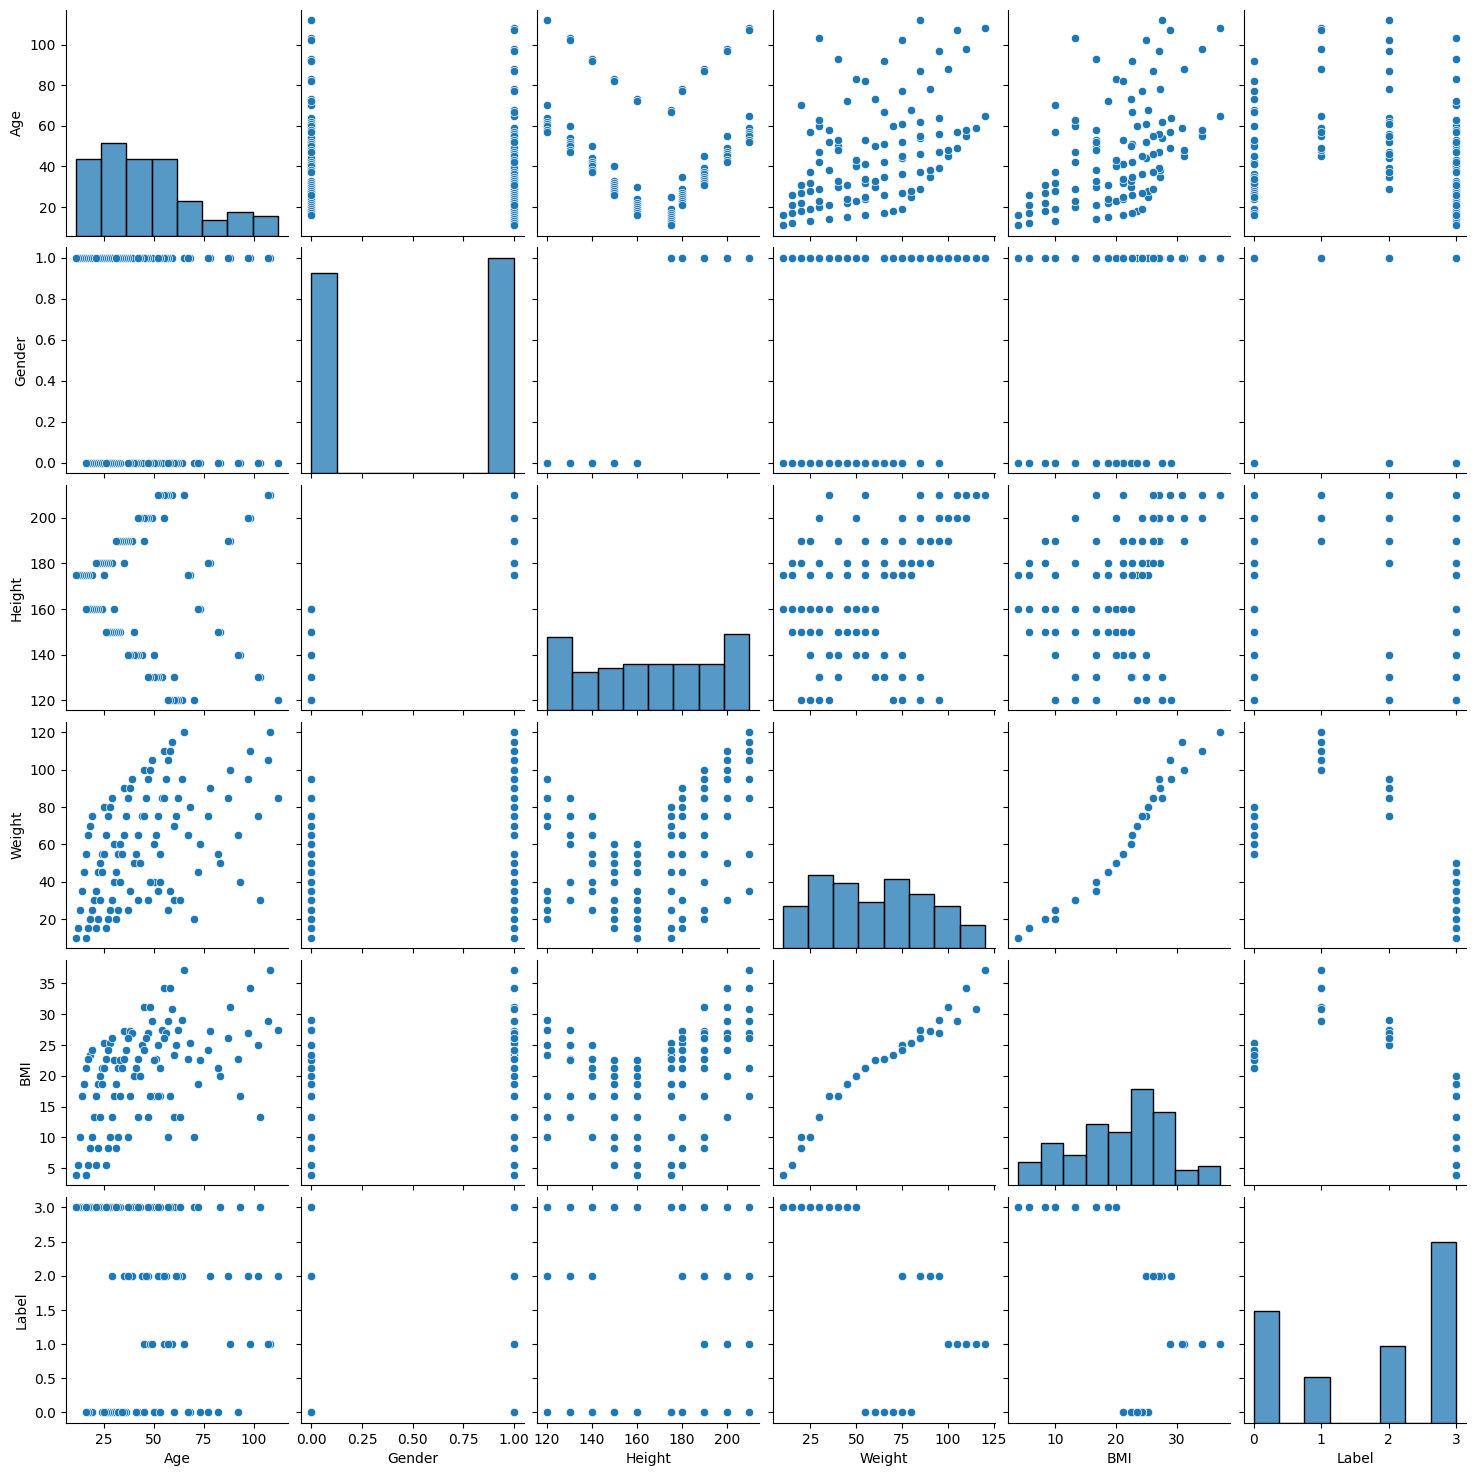

In [ ]:
sns.pairplot(data)

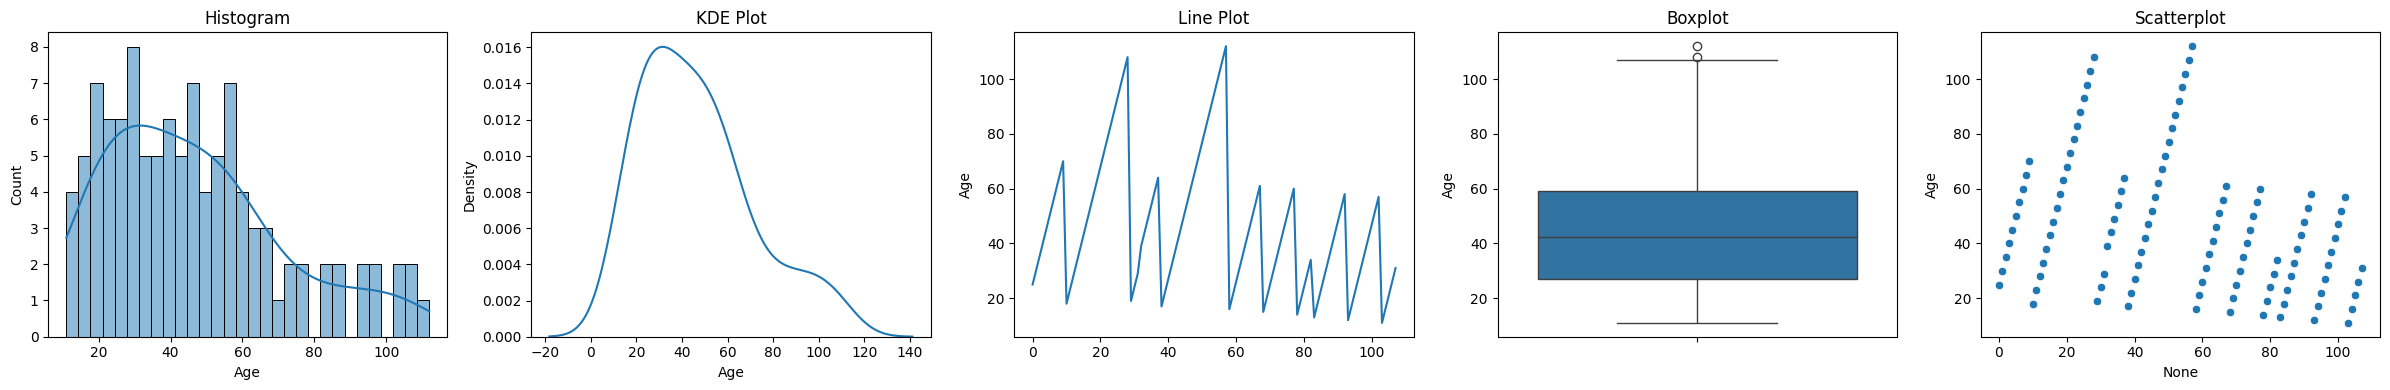

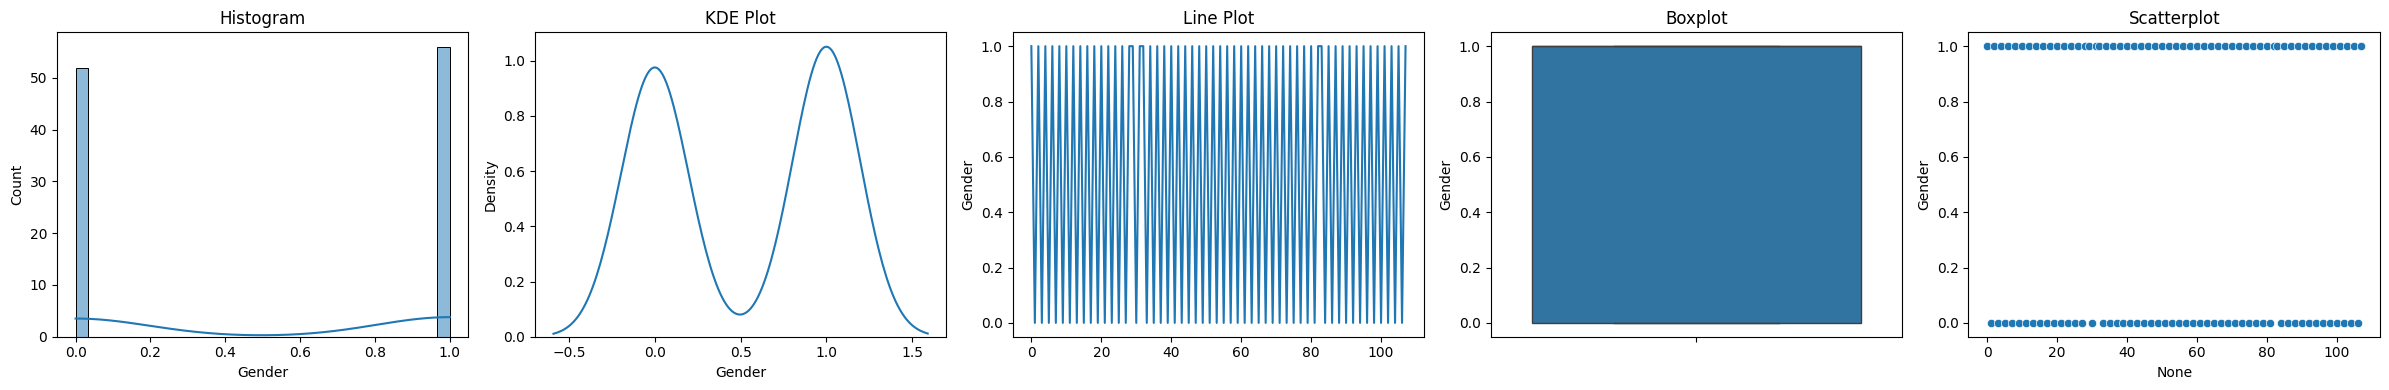

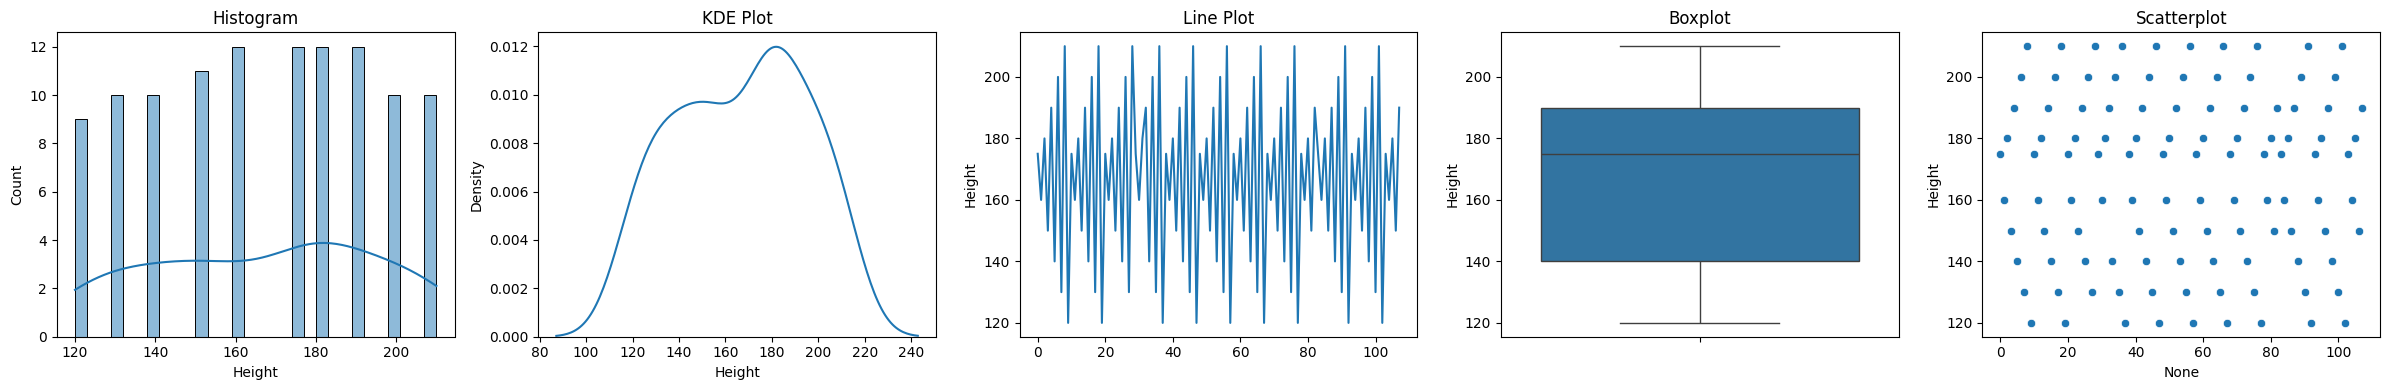

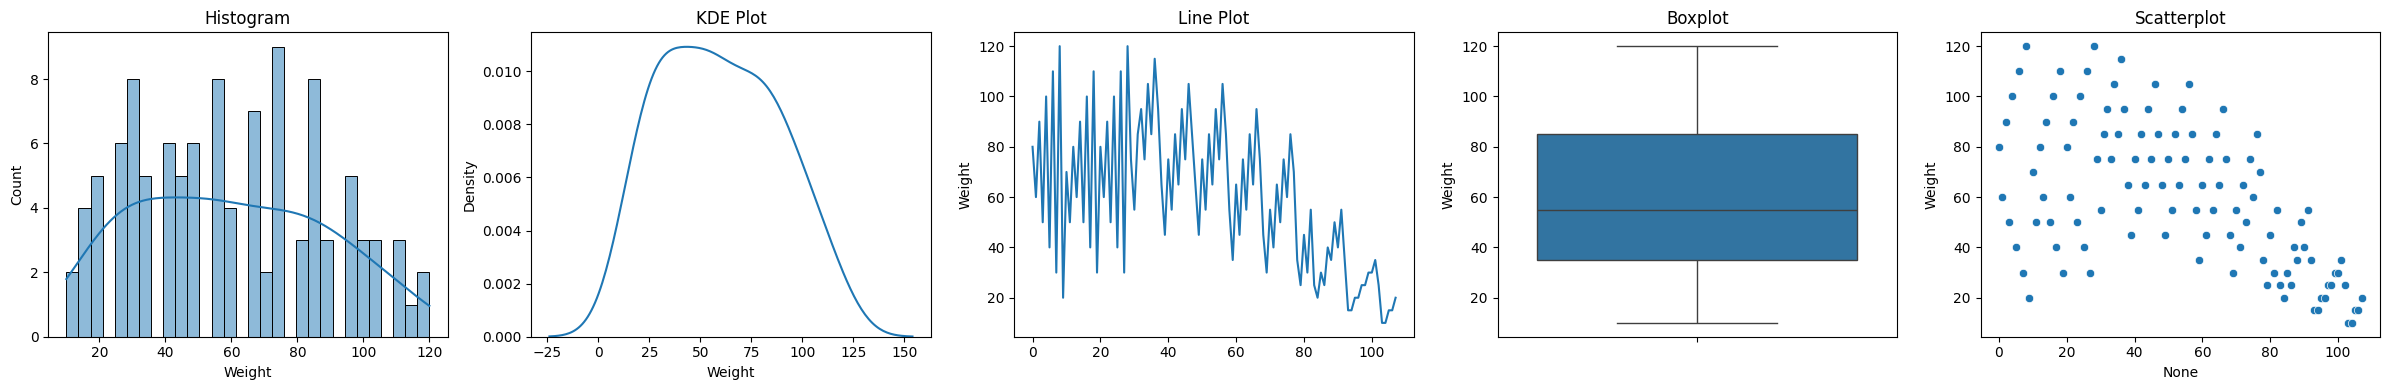

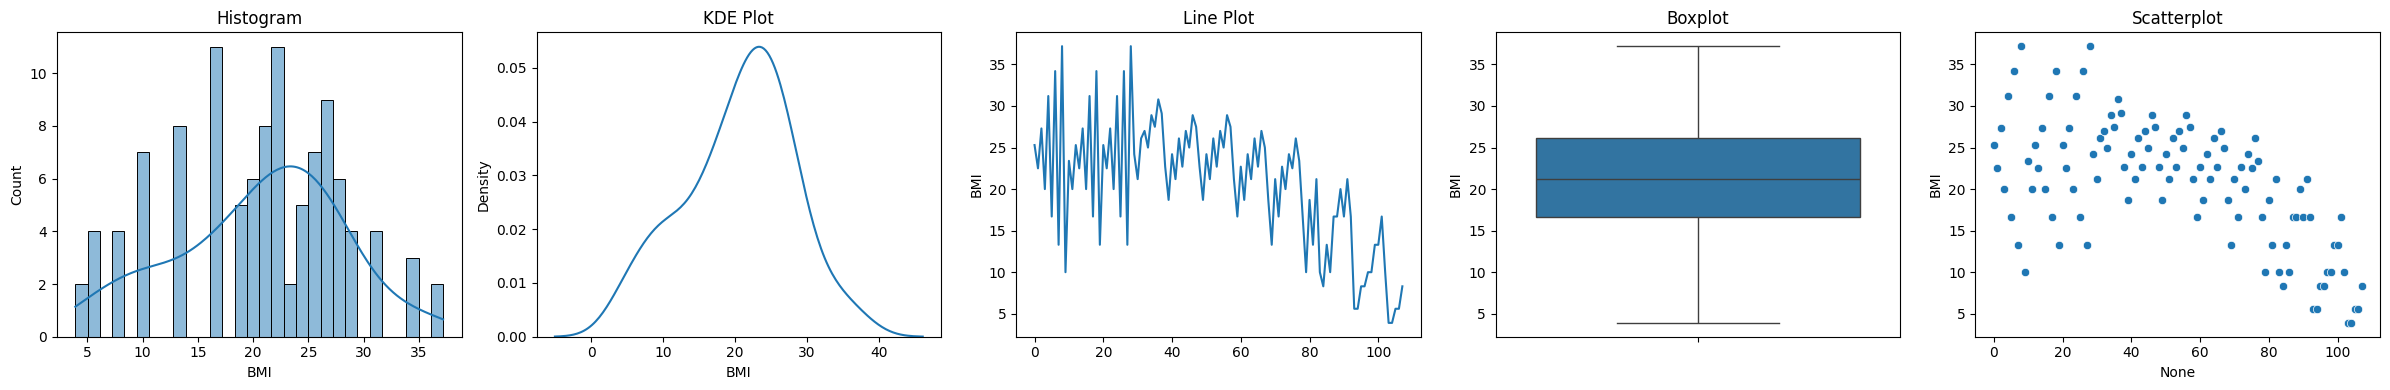

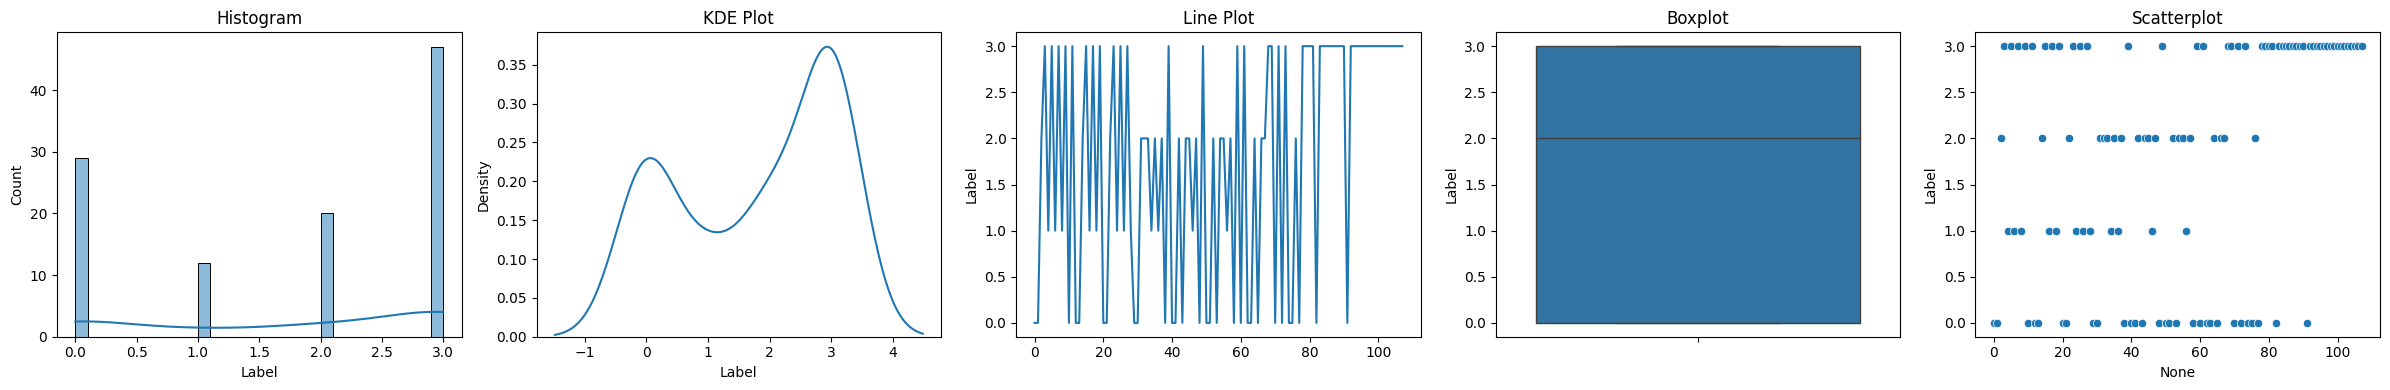

In [ ]:
def plots(df, variable):
  if df[variable].dtype != object:
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))

    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')

    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')

    # Line plot
    sns.lineplot(df[variable], ax=ax[2])
    ax[2].set_title('Line Plot')

    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')

    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')

    plt.tight_layout()
    plt.show()

for i in data.columns:
    plots(data ,i)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
dtc_pred

array([3, 0, 2, 3, 0, 2, 2, 1, 1, 2, 3, 0, 0, 1, 0, 3, 3, 0, 0, 3, 0, 3])

In [ ]:
accuracy_score(y_test,dtc_pred)

0.9545454545454546

In [ ]:
print(f"Accuracy score for Decission tree Classifier {accuracy_score(y_test,dtc_pred)}")

Accuracy score for Decission tree Classifier 0.9545454545454546


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         7

    accuracy                           0.95        22
   macro avg       0.94      0.97      0.95        22
weighted avg       0.97      0.95      0.96        22



In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree


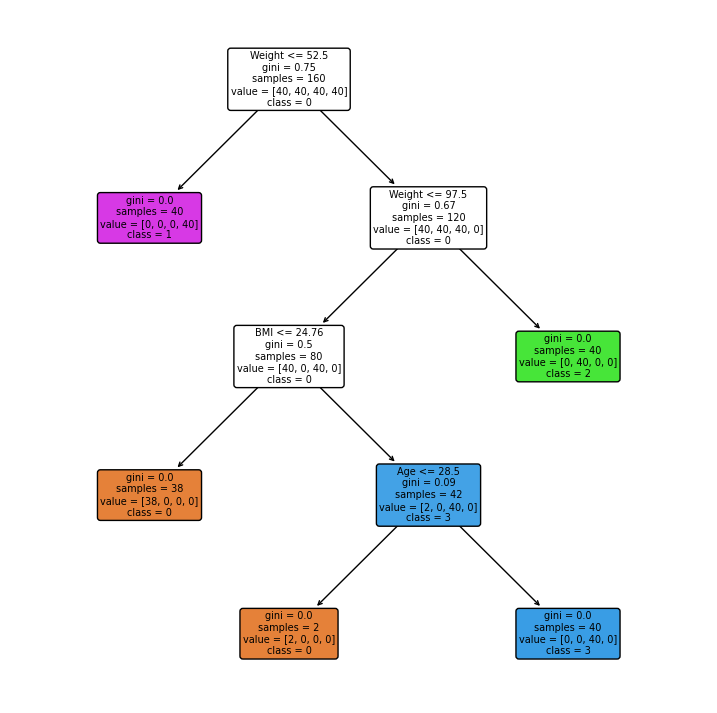

In [ ]:
plt.figure(figsize=(9, 9))
tree.plot_tree(dtc,
               feature_names=X.columns,
               class_names=data['Label'].unique().astype(str),
               filled=True,
               fontsize=7,
               rounded=True,
               max_depth=5,  # Menampilkan pohon dengan kedalaman maksimum 5
               precision=2)  # Menampilkan angka dengan presisi 2
plt.show()
